# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
#pip install citipy
import os
import csv
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import random
import seaborn as sns
import requests
import urllib
import time
import json
from pprint import pprint
from datetime import datetime
import scipy.stats as st
from scipy.stats import linregress
#pip install <citipy>

# Import API key
from API_keys import Weathermap_API_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = [] 

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
city_count = len(cities)
print(city_count)

604


In [3]:
cities_df=pd.DataFrame(cities)
cities_df.columns=["City"]
cities_df['Cloudiness'] = ""
cities_df['Country'] = ""
cities_df['Date'] = ""
cities_df['Humidity'] = ""
cities_df['Lat']=""
cities_df['Lng']=""
cities_df['Max Temp']=""
cities_df['Wind Speed']=""
cities_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,bambous virieux,,,,,,,,
1,kaitangata,,,,,,,,
2,saldanha,,,,,,,,
3,bonthe,,,,,,,,
4,asau,,,,,,,,


## Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"
# Build partial query URL
query_url = f"{url}appid={Weathermap_API_key}&units={units}&q="
print(query_url+"London")
#response = requests.get(query_url+"London").json()
#print(response)
new_cities = []
cloudiness = []
country = []
date = []
humidity = []
temp = []
lat = []
lng = []
wind = []
city_data = []
print("Beginning Data Retrieval ")
record_counter = 0
set_counter = 1
for city in cities:
    response = requests.get(query_url + city).json()
    if record_counter < 50:
        record_counter += 1
    else:
        set_counter +=1
        record_counter = 0
    print('Processing record {} of set {} | {}'.format(record_counter, set_counter, city))
    print(url)
    try:
        new_cities.append(response['name'])
        cloudiness.append(response['clouds'] ['all'])
        country.append(response['sys'] ['country'])
        date.append(response['date'])
        humidity.append(response['main'] ['humidity'])
        lat.append(response['coord'] ['lat'])
        lng.append(response['coord'] ['lon'])
        temp.append(response['main'] ['temp_max'])
        wind.append(response['wind'] ['speed'])
        time.sleep(.2)
    except:
        print(f'City not found. Skipping...')
        pass 
print(f'----------------------------------------------')
print(f'Data Retrieval Complete')
print(f'----------------------------------------------')


http://api.openweathermap.org/data/2.5/weather?appid=f563cc6b4ded9445677bab30a69c5435&units=metric&q=London
Beginning Data Retrieval 
Processing record 1 of set 1 | bambous virieux
http://api.openweathermap.org/data/2.5/weather?
City not found. Skipping...
Processing record 2 of set 1 | kaitangata
http://api.openweathermap.org/data/2.5/weather?
City not found. Skipping...
Processing record 3 of set 1 | saldanha
http://api.openweathermap.org/data/2.5/weather?
City not found. Skipping...
Processing record 4 of set 1 | bonthe
http://api.openweathermap.org/data/2.5/weather?
City not found. Skipping...
Processing record 5 of set 1 | asau
http://api.openweathermap.org/data/2.5/weather?
City not found. Skipping...
Processing record 6 of set 1 | aquiraz
http://api.openweathermap.org/data/2.5/weather?
City not found. Skipping...
Processing record 7 of set 1 | lamar
http://api.openweathermap.org/data/2.5/weather?
City not found. Skipping...
Processing record 8 of set 1 | pisco
http://api.openwea

Processing record 19 of set 2 | drumheller
http://api.openweathermap.org/data/2.5/weather?
City not found. Skipping...
Processing record 20 of set 2 | kavaratti
http://api.openweathermap.org/data/2.5/weather?
City not found. Skipping...
Processing record 21 of set 2 | jumla
http://api.openweathermap.org/data/2.5/weather?
City not found. Skipping...
Processing record 22 of set 2 | nikolskoye
http://api.openweathermap.org/data/2.5/weather?
City not found. Skipping...
Processing record 23 of set 2 | north bend
http://api.openweathermap.org/data/2.5/weather?
City not found. Skipping...
Processing record 24 of set 2 | sao joao da barra
http://api.openweathermap.org/data/2.5/weather?
City not found. Skipping...
Processing record 25 of set 2 | tual
http://api.openweathermap.org/data/2.5/weather?
City not found. Skipping...
Processing record 26 of set 2 | puerto del rosario
http://api.openweathermap.org/data/2.5/weather?
City not found. Skipping...
Processing record 27 of set 2 | grand river s

Processing record 39 of set 3 | merritt island
http://api.openweathermap.org/data/2.5/weather?
City not found. Skipping...
Processing record 40 of set 3 | isangel
http://api.openweathermap.org/data/2.5/weather?
City not found. Skipping...
Processing record 41 of set 3 | pevek
http://api.openweathermap.org/data/2.5/weather?
City not found. Skipping...
Processing record 42 of set 3 | upernavik
http://api.openweathermap.org/data/2.5/weather?
City not found. Skipping...
Processing record 43 of set 3 | byron bay
http://api.openweathermap.org/data/2.5/weather?
City not found. Skipping...
Processing record 44 of set 3 | avallon
http://api.openweathermap.org/data/2.5/weather?
City not found. Skipping...
Processing record 45 of set 3 | batagay-alyta
http://api.openweathermap.org/data/2.5/weather?
City not found. Skipping...
Processing record 46 of set 3 | darhan
http://api.openweathermap.org/data/2.5/weather?
City not found. Skipping...
Processing record 47 of set 3 | avarua
http://api.openweat

Processing record 11 of set 5 | saint-denis
http://api.openweathermap.org/data/2.5/weather?
City not found. Skipping...
Processing record 12 of set 5 | obo
http://api.openweathermap.org/data/2.5/weather?
City not found. Skipping...
Processing record 13 of set 5 | san ignacio
http://api.openweathermap.org/data/2.5/weather?
City not found. Skipping...
Processing record 14 of set 5 | katsuura
http://api.openweathermap.org/data/2.5/weather?
City not found. Skipping...
Processing record 15 of set 5 | yellowknife
http://api.openweathermap.org/data/2.5/weather?
City not found. Skipping...
Processing record 16 of set 5 | longyearbyen
http://api.openweathermap.org/data/2.5/weather?
City not found. Skipping...
Processing record 17 of set 5 | san quintin
http://api.openweathermap.org/data/2.5/weather?
City not found. Skipping...
Processing record 18 of set 5 | phalaborwa
http://api.openweathermap.org/data/2.5/weather?
City not found. Skipping...
Processing record 19 of set 5 | pucara
http://api.o

Processing record 32 of set 6 | banda aceh
http://api.openweathermap.org/data/2.5/weather?
City not found. Skipping...
Processing record 33 of set 6 | arraial do cabo
http://api.openweathermap.org/data/2.5/weather?
City not found. Skipping...
Processing record 34 of set 6 | wang saphung
http://api.openweathermap.org/data/2.5/weather?
City not found. Skipping...
Processing record 35 of set 6 | basco
http://api.openweathermap.org/data/2.5/weather?
City not found. Skipping...
Processing record 36 of set 6 | tuatapere
http://api.openweathermap.org/data/2.5/weather?
City not found. Skipping...
Processing record 37 of set 6 | maniitsoq
http://api.openweathermap.org/data/2.5/weather?
City not found. Skipping...
Processing record 38 of set 6 | barabai
http://api.openweathermap.org/data/2.5/weather?
City not found. Skipping...
Processing record 39 of set 6 | antalaha
http://api.openweathermap.org/data/2.5/weather?
City not found. Skipping...
Processing record 40 of set 6 | koroni
http://api.ope

Processing record 0 of set 8 | kuminskiy
http://api.openweathermap.org/data/2.5/weather?
City not found. Skipping...
Processing record 1 of set 8 | waimana
http://api.openweathermap.org/data/2.5/weather?
City not found. Skipping...
Processing record 2 of set 8 | bestobe
http://api.openweathermap.org/data/2.5/weather?
City not found. Skipping...
Processing record 3 of set 8 | peschanokopskoye
http://api.openweathermap.org/data/2.5/weather?
City not found. Skipping...
Processing record 4 of set 8 | attawapiskat
http://api.openweathermap.org/data/2.5/weather?
City not found. Skipping...
Processing record 5 of set 8 | ulaangom
http://api.openweathermap.org/data/2.5/weather?
City not found. Skipping...
Processing record 6 of set 8 | aberystwyth
http://api.openweathermap.org/data/2.5/weather?
City not found. Skipping...
Processing record 7 of set 8 | belyy yar
http://api.openweathermap.org/data/2.5/weather?
City not found. Skipping...
Processing record 8 of set 8 | san patricio
http://api.op

Processing record 22 of set 9 | cochrane
http://api.openweathermap.org/data/2.5/weather?
City not found. Skipping...
Processing record 23 of set 9 | inyonga
http://api.openweathermap.org/data/2.5/weather?
City not found. Skipping...
Processing record 24 of set 9 | poum
http://api.openweathermap.org/data/2.5/weather?
City not found. Skipping...
Processing record 25 of set 9 | khatanga
http://api.openweathermap.org/data/2.5/weather?
City not found. Skipping...
Processing record 26 of set 9 | mukhen
http://api.openweathermap.org/data/2.5/weather?
City not found. Skipping...
Processing record 27 of set 9 | nusaybin
http://api.openweathermap.org/data/2.5/weather?
City not found. Skipping...
Processing record 28 of set 9 | ola
http://api.openweathermap.org/data/2.5/weather?
City not found. Skipping...
Processing record 29 of set 9 | maloshuyka
http://api.openweathermap.org/data/2.5/weather?
City not found. Skipping...
Processing record 30 of set 9 | nelson bay
http://api.openweathermap.org/d

Processing record 41 of set 10 | babanka
http://api.openweathermap.org/data/2.5/weather?
City not found. Skipping...
Processing record 42 of set 10 | tazovskiy
http://api.openweathermap.org/data/2.5/weather?
City not found. Skipping...
Processing record 43 of set 10 | boa vista
http://api.openweathermap.org/data/2.5/weather?
City not found. Skipping...
Processing record 44 of set 10 | contai
http://api.openweathermap.org/data/2.5/weather?
City not found. Skipping...
Processing record 45 of set 10 | the valley
http://api.openweathermap.org/data/2.5/weather?
City not found. Skipping...
Processing record 46 of set 10 | sistranda
http://api.openweathermap.org/data/2.5/weather?
City not found. Skipping...
Processing record 47 of set 10 | manaure
http://api.openweathermap.org/data/2.5/weather?
City not found. Skipping...
Processing record 48 of set 10 | milas
http://api.openweathermap.org/data/2.5/weather?
City not found. Skipping...
Processing record 49 of set 10 | sobolevo
http://api.openw

Processing record 10 of set 12 | owosso
http://api.openweathermap.org/data/2.5/weather?
City not found. Skipping...
Processing record 11 of set 12 | srednekolymsk
http://api.openweathermap.org/data/2.5/weather?
City not found. Skipping...
Processing record 12 of set 12 | bereda
http://api.openweathermap.org/data/2.5/weather?
City not found. Skipping...
Processing record 13 of set 12 | sibolga
http://api.openweathermap.org/data/2.5/weather?
City not found. Skipping...
Processing record 14 of set 12 | matay
http://api.openweathermap.org/data/2.5/weather?
City not found. Skipping...
Processing record 15 of set 12 | vila franca do campo
http://api.openweathermap.org/data/2.5/weather?
City not found. Skipping...
Processing record 16 of set 12 | katherine
http://api.openweathermap.org/data/2.5/weather?
City not found. Skipping...
Processing record 17 of set 12 | qostanay
http://api.openweathermap.org/data/2.5/weather?
City not found. Skipping...
Processing record 18 of set 12 | dinard
http:/

## Convert Raw Data to DataFrame
* Save as csv

In [5]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"
# Build partial query URL
query_url = f"{url}appid={Weathermap_API_key}&units={units}&q="
print(query_url+"London")
data=[]
i=0
for city in cities[:50]:
#    print(city)
    json = requests.get(query_url + city).json()
    i=i+1
    try:
        tempmax=json["main"]['temp_max']
        humidity=json["main"]["humidity"]
        speed=json['wind']["speed"]
        cloudiness=json["clouds"]["all"]
        lat=json["coord"]["lat"]
        country=json['sys']["country"]
        date=json['dt']
        lon=json["coord"]["lon"]
        data.append([city,cloudiness,country,date,humidity,lat,lon,tempmax,speed])
#        data.append([city,temp,temp1,temp2,temp3,temp6,temp4,temp5,temp7])
        print(f"counter {i} || {city}")
        time.sleep(.1)
    except:
        print("city not found")

http://api.openweathermap.org/data/2.5/weather?appid=f563cc6b4ded9445677bab30a69c5435&units=metric&q=London
counter 1 || bambous virieux
counter 2 || kaitangata
counter 3 || saldanha
counter 4 || bonthe
counter 5 || asau
counter 6 || aquiraz
counter 7 || lamar
counter 8 || pisco
counter 9 || puerto ayora
counter 10 || rikitea
counter 11 || hay river
counter 12 || morgan city
counter 13 || kondopoga
counter 14 || nara
counter 15 || mangrol
counter 16 || dalby
counter 17 || salalah
counter 18 || kamiiso
counter 19 || kapaa
counter 20 || norman wells
counter 21 || natal
counter 22 || qaanaaq
counter 23 || lebu
counter 24 || hamilton
counter 25 || ushuaia
counter 26 || saint george
counter 27 || albany
counter 28 || mataura
counter 29 || bairiki
counter 30 || goderich
counter 31 || skegness
counter 32 || hasaki
counter 33 || mackenzie
counter 34 || grand-santi
counter 35 || cape town
counter 36 || jamestown
counter 37 || warmbad
city not found
counter 39 || cheremukhovo
counter 40 || herma

In [6]:
data_df=pd.DataFrame(data,columns=["City","Cloudiness","Country", "Date","Humidity","Lat","Lng","Max Temp","Wind Speed"])
data_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,bambous virieux,40,MU,1603801670,61,-20.34,57.76,26.11,4.10
1,kaitangata,2,NZ,1603801659,72,-46.28,169.85,10.00,3.13
2,saldanha,100,ZA,1603801661,60,-33.01,17.94,20.00,3.60
3,bonthe,100,SL,1603801821,60,7.53,-12.51,31.54,3.18
4,asau,0,RO,1603801703,85,46.43,26.40,13.89,1.91


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

### Latitude vs. Temperature Plot

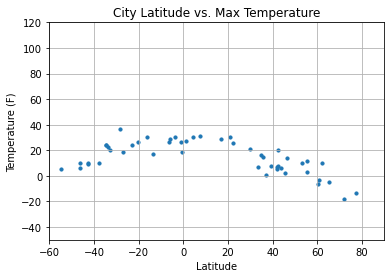

In [7]:

weather_df = pd.DataFrame(data_df)
plt.scatter(weather_df["Lat"], weather_df["Max Temp"], marker = "o", s=10)
plt.title(f"City Latitude vs. Max Temperature")
plt.ylabel("Temperature (F)")
plt.ylim(-50,120)
plt.xlabel("Latitude")
plt.xlim(-60,90)
plt.grid(True)
plt.savefig("Temperature.png")
plt.show()



### Latitude vs. Humidity Plot

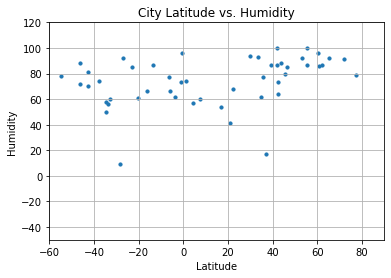

In [8]:
weather_df = pd.DataFrame(data_df)
plt.scatter(weather_df["Lat"], weather_df["Humidity"], marker = "o", s=10)
plt.title(f"City Latitude vs. Humidity")
plt.ylabel("Humidity")
plt.ylim(-50,120)
plt.xlabel("Latitude")
plt.xlim(-60,90)
plt.grid(True)
plt.savefig("Humidity.png")
plt.show()

### Latitude vs. Cloudiness Plot

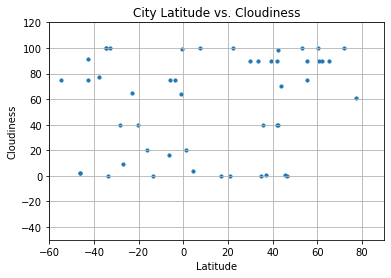

In [9]:
weather_df = pd.DataFrame(data_df)
plt.scatter(weather_df["Lat"], weather_df["Cloudiness"], marker = "o", s=10)
plt.title(f"City Latitude vs. Cloudiness")
plt.ylabel("Cloudiness")
plt.ylim(-50,120)
plt.xlabel("Latitude")
plt.xlim(-60,90)
plt.grid(True)
plt.savefig("Cloudiness.png")
plt.show()

### Latitude vs. Wind Speed Plot

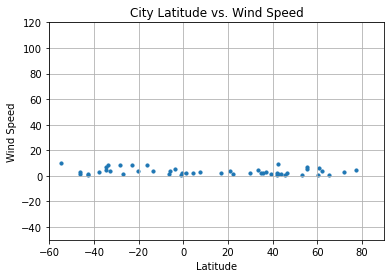

In [10]:
weather_df = pd.DataFrame(data_df)
plt.scatter(weather_df["Lat"], weather_df["Wind Speed"], marker = "o", s=10)
plt.title(f"City Latitude vs. Wind Speed")
plt.ylabel("Wind Speed")
plt.ylim(-50,120)
plt.xlabel("Latitude")
plt.xlim(-60,90)
plt.grid(True)
plt.savefig("WindSpeed.png")
plt.show()

## Linear Regression

### Write linear regression plot function (optional)

In [11]:
def LinearRegressionplot(x_values, y_values):
    (slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values,y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y =" + str(round(slope,2)) + "x +" + str(round(intercept,2))
    plt.scatter(x_values, y_values)
    plt.plot(x_values,regress_values,"r-" )
    plt.xlabel('Latitude')
    plt.ylabel(str(y_values.name))
    plt.annotate(line_eq,(0,0), fontsize=15,color="red")
    print(f"The r-squared is: {rvalue}")
plt.show()

###  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: -0.8827553472551308


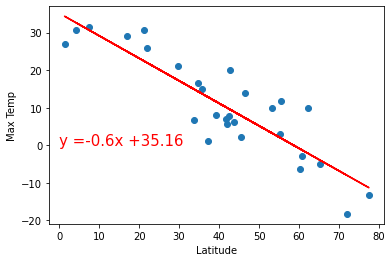

In [12]:
Northern_Hemisphere = weather_df.loc[weather_df['Lat']>0]
Southern_Hemisphere = weather_df.loc[weather_df['Lat']<0]
x_values = Northern_Hemisphere["Lat"]
y_values = Northern_Hemisphere["Max Temp"]
LinearRegressionplot(x_values, y_values)

###  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.6904807142227919


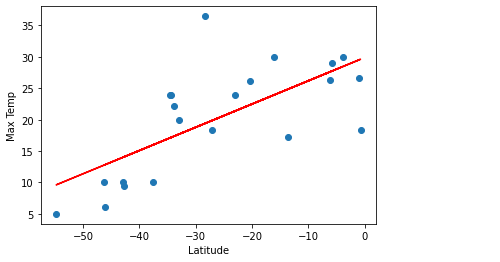

In [13]:
Northern_Hemisphere = weather_df.loc[weather_df['Lat']>0]
Southern_Hemisphere = weather_df.loc[weather_df['Lat']<0]
x_values = Southern_Hemisphere["Lat"]
y_values = Southern_Hemisphere["Max Temp"]
LinearRegressionplot(x_values, y_values)

###  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.5172519933570083


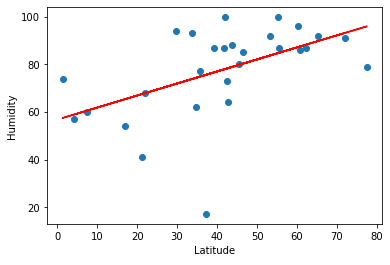

In [14]:
Northern_Hemisphere = weather_df.loc[weather_df['Lat']>0]
Southern_Hemisphere = weather_df.loc[weather_df['Lat']<0]
x_values = Northern_Hemisphere["Lat"]
y_values = Northern_Hemisphere["Humidity"]
LinearRegressionplot(x_values, y_values)

###  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.07791083231573574


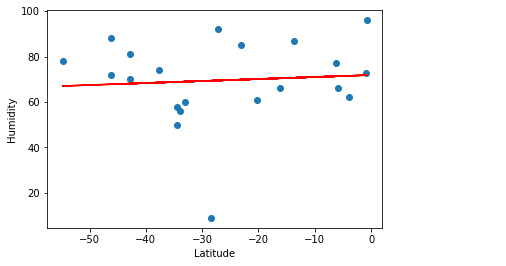

In [15]:
Northern_Hemisphere = weather_df.loc[weather_df['Lat']>0]
Southern_Hemisphere = weather_df.loc[weather_df['Lat']<0]
x_values = Southern_Hemisphere["Lat"]
y_values = Southern_Hemisphere["Humidity"]
LinearRegressionplot(x_values, y_values)

###  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.41559809735143177


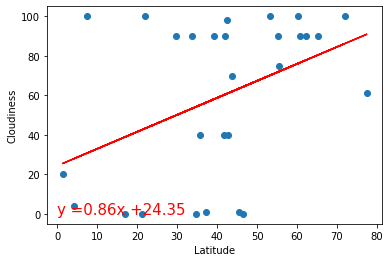

In [16]:
Northern_Hemisphere = weather_df.loc[weather_df['Lat']>0]
Southern_Hemisphere = weather_df.loc[weather_df['Lat']<0]
x_values = Northern_Hemisphere["Lat"]
y_values = Northern_Hemisphere["Cloudiness"]
LinearRegressionplot(x_values, y_values)

###  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.011487239522644428


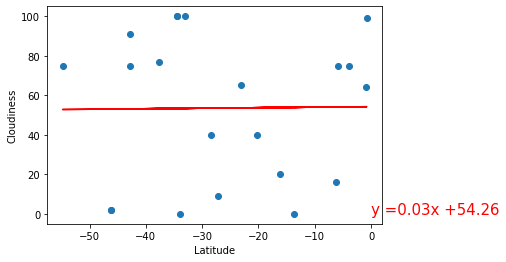

In [17]:
Northern_Hemisphere = weather_df.loc[weather_df['Lat']>0]
Southern_Hemisphere = weather_df.loc[weather_df['Lat']<0]
x_values = Southern_Hemisphere["Lat"]
y_values = Southern_Hemisphere["Cloudiness"]
LinearRegressionplot(x_values, y_values)

###  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.16223020454093115


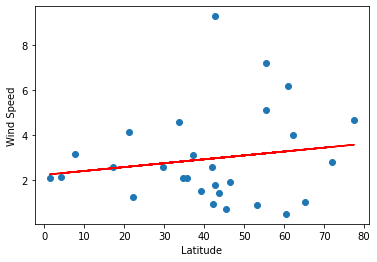

In [18]:
Northern_Hemisphere = weather_df.loc[weather_df['Lat']>0]
Southern_Hemisphere = weather_df.loc[weather_df['Lat']<0]
x_values = Northern_Hemisphere["Lat"]
y_values = Northern_Hemisphere["Wind Speed"]
LinearRegressionplot(x_values, y_values)

###  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: -0.17520803257229395


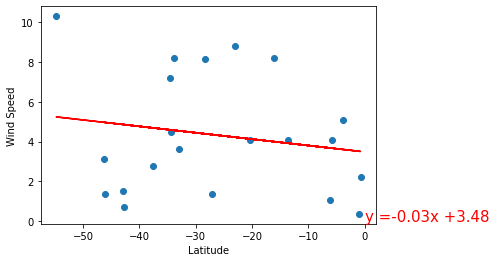

In [19]:
Northern_Hemisphere = weather_df.loc[weather_df['Lat']>0]
Southern_Hemisphere = weather_df.loc[weather_df['Lat']<0]
x_values = Southern_Hemisphere["Lat"]
y_values = Southern_Hemisphere["Wind Speed"]
LinearRegressionplot(x_values, y_values)